In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn import set_config
set_config(display = 'diagram')

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
X = df.drop(columns= ['Purchased'])
y = df['Purchased']

In [5]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
numeric_feature = X_train.select_dtypes('number').columns
categorical_features = X_train.select_dtypes('object').columns

In [7]:
numeric_transformer = make_pipeline(SimpleImputer(strategy = 'median'), StandardScaler())
categorical_transformer = make_pipeline(SimpleImputer(strategy = 'constant', fill_value = "missing"), OneHotEncoder())

In [8]:
col_transformer = make_column_transformer(
  (numeric_transformer, numeric_feature), 
    (categorical_transformer, categorical_features),
remainder = 'passthrough')

In [9]:
col_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['User ID', 'Age', 'EstimatedSalary'], dtype='object')),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 Index(['Gender'], dtype='object'))])

In [20]:
pipe = make_pipeline(col_transformer, GaussianNB())

In [21]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['User ID', 'Age', 'EstimatedSalary'], dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  Index(['Gender'], dtype='object'))])),
                ('gaussiannb', GaussianNB())])

In [22]:
from sklearn.model_selection import cross_validate
with_categorical_score = cross_validate(pipe, X_train, y_train, return_train_score = True)

In [23]:
categorical_score = pd.DataFrame(with_categorical_score)
categorical_score

,fit_time,score_time,test_score,train_score
0,0.009908,0.016472,0.843750,0.894531
1,0.019561,0.004997,0.765625,0.890625
2,0.009804,0.003996,0.828125,0.886719
3,0.000000,0.000000,0.906250,0.863281
4,0.000000,0.015623,0.968750,0.855469


In [24]:
categorical_score.mean()

fit_time       0.007855
score_time     0.008218
test_score     0.862500
train_score    0.878125
dtype: float64

In [25]:
pipe.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [26]:
pipe.score(X_train, y_train)

0.88125

In [27]:
pipe.score(X_test, y_test)

0.925

Text(0, 0.5, 'salary')

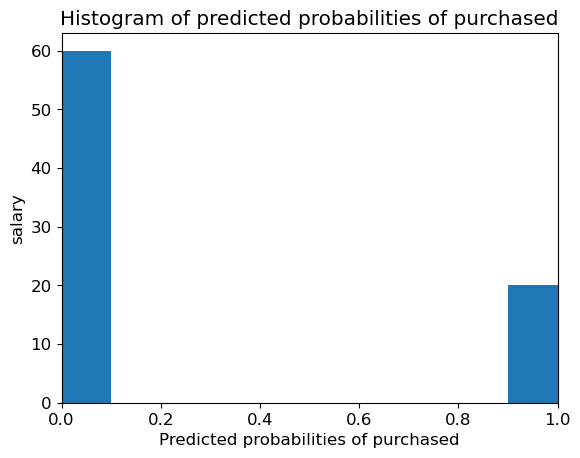

In [28]:
plt.rcParams['font.size'] = 12
plt.hist(pipe.predict(X_test), bins = 10)
plt.title('Histogram of predicted probabilities of purchased')
plt.xlim(0,1)
plt.xlabel('Predicted probabilities of purchased')
plt.ylabel('salary')